# Homework 4 Question 2: Voltage Smoothing 
We would like to send a sequence of voltage inputs to the manipulator
arm of a robot. The desired signal is shown in the plot below (also available in voltages.csv)

Unfortunately, abrupt changes in voltage cause undue wear and tear on the motors over time, so we
would like to modify the signal so that the transitions are smoother. If the voltages above are given
by $v_1, v_2, . . . , v_{200}$, one way to characterize smoothness is via the sum of squared differences:

$$R(v) = (v_2 − v_1)^2 + (v_3 − v_2)^2 + · · · + (v_{200} − v_{199})^2$$

When R(v) is smaller, the voltage is smoother. Solve a regularized least squares problem that explores
the tradeoff between matching the desired signal above and making the signal smooth. Explain your
reasoning, and include a plot comparing the desired voltages with your smoothed voltages.

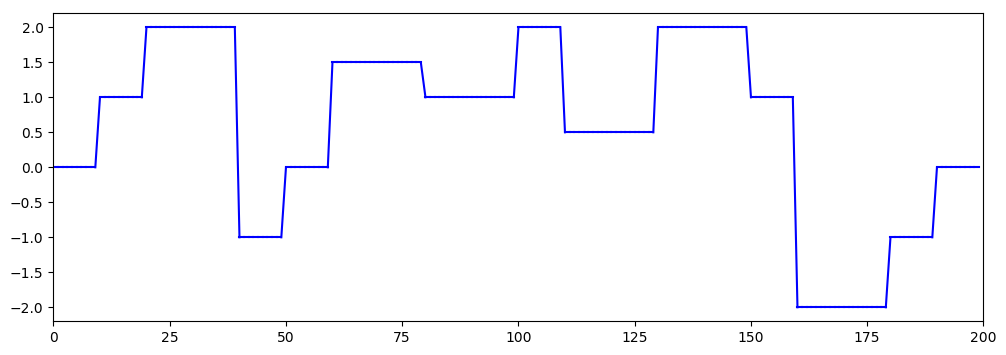

In [7]:
# Load the data file
raw = readcsv("voltages.csv")

using PyPlot
figure(figsize=(12,4))
xlim(0,200)
[plot(linspace(i-1,i,10),linspace(raw[i],raw[i+1],10),"b") for i in 1:length(raw)-1];

In [8]:
using JuMP, Gurobi

λ = [0.1,1,10]
smooth = zeros(length(raw),length(λ))
for i in 1:length(λ)
    m = Model(solver=GurobiSolver(OutputFlag=0))

    @variable(m, v[1:length(raw)])
    @expression(m, infidelity, sum((v[i]-raw[i])^2 for i in 1:length(raw)))
    @expression(m, sharpness, sum((v[i+1] - v[i])^2 for i in 1:length(raw)-1))

    @objective(m, Min, infidelity + λ[i]*sharpness)
    solve(m)
    smooth[:,i] = getvalue(v)
    println("Objective Value:",getobjectivevalue(m),", for lambda: ",λ[i])
end

Objective Value:2.7044936151369257, for lambda: 0.1
Objective Value:14.310953247228213, for lambda: 1.0
Objective Value:50.14612903783541, for lambda: 10.0


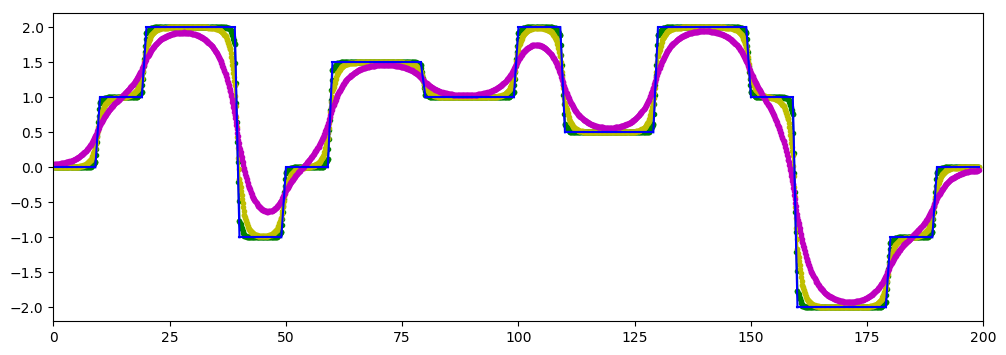

In [9]:
figure(figsize=(12,4))
xlim(0,200)
color = ["g.-","y.-","m.-"]
for l in 1:length(λ)
    [plot(linspace(i-1,i,10),linspace(smooth[i,l],smooth[i+1,l],10),color[l])
        for i in 1:length(smooth[1:end,l])-1]
end
[plot(linspace(i-1,i,10),linspace(raw[i],raw[i+1],10),"b") for i in 1:length(raw)-1];

The $\lambda$ gives relative importanace to minimize infidelity vs sharpness. Since smoothness is the desired property for our signal, $\lambda$ is associated with sharpness. More the weight given to sharpness, more smooth the resulting voltage turns out to be and vice-versa.

The above graph has the legend is as follows (wasn't able to code it):
- __Magenta line : $ \lambda = 10$__, This is the most smooth curve but deviates significantly from the original voltage signal because of large $\lambda$, as the objective to minimize the sharpness is more important than fidelity.
- __Yellow line :  $ \lambda = 1 $__, This gives equal importance to both smoothness and fidelity.
- __Green line :   $ \lambda = 0.1$__, This gives more importance to fidelity than smoothness so the voltage curve looks more like the original voltage signal.
- __Blue line:__ Is the original signal.